# GIS in Python

Die bisherigen Aufgaben hatten noch nicht viel mit GIS zu tun. Die Koordinaten der Zeckenstiche sind uns zwar bekannt, es handelt es dabei aber lediglich um Numerische xy-Werte, nicht um Geometrische Punkte mit einem Raumbezug. So bleiben uns bis jetzt alle räumlichen Operationen vorenthalten (zum Beispiel ob sich ein Stich im Wald befindet oder nicht), und wir können auch keine schönen Karten generieren. 

Um mit Geodaten in Python arbeiten zu können, müssen wir ein neues Modul importieren. Im Grunde genommen sind Vektordaten nicht mehr als Tabellen mit einer zusätzlichen "Geometrie"-Spalte, dementsprechend baut die "Geo"-Erweiterung auf `pandas` auf und heisst: `geopandas`. 

Du solltest `geopandas` bereits installiert haben und das Modul in dein Script importieren. Importiere `geopandas` mit dem Alias `gpd`. 


## Übung 1: *DataFrame* zu *GeoDataFrame*

Wie erwähnt sind die Zeckenstichdaten bisher lediglich als tabellarische Daten vorhanden. In ArcGIS Terminologie müssen wir die Operation "[XY Table to Point](https://pro.arcgis.com/de/pro-app/tool-reference/data-management/xy-table-to-point.htm)" durchführen. In Python heisst das: Wir wandeln eine *DataFrame* in eine *GeoDataFrame* um. Zuerst erstellen wir eine Geometrie-Spalte aus den xy-Koordinaten mit der Funktion `points_from_xy` aus dem Modul `geopandas`.

In [22]:
import pandas as pd
zeckenstiche = pd.read_csv("zeckenstiche.csv")

import geopandas as gpd

In [23]:
zeckenstiche["geometry"] = gpd.points_from_xy(zeckenstiche.x, zeckenstiche.y)

Der Datensatz `zeckenstiche` hat jetzt aber noch nicht begriffen, dass es jetzt eine `GeoDataFrame` ist. Dies müssen wir dem Objekt erst noch mitteilen:

In [24]:
zeckenstiche = gpd.GeoDataFrame(zeckenstiche)

zeckenstiche

,ID,accuracy,x,y,geometry
0,0,65.617154,2678971.0,1240824.0,POINT (2678971.000 1240824.000)
1,1,257.492052,2679837.0,1240858.0,POINT (2679837.000 1240858.000)
2,2,163.533834,2687539.0,1240881.0,POINT (2687539.000 1240881.000)
3,3,185.000000,2674848.0,1240913.0,POINT (2674848.000 1240913.000)
4,4,228.215231,2681771.0,1240922.0,POINT (2681771.000 1240922.000)
...,...,...,...,...,...
1071,1071,109.531946,2678005.0,1257344.0,POINT (2678005.000 1257344.000)
1072,1072,100.489274,2678005.0,1257347.0,POINT (2678005.000 1257347.000)
1073,1073,301.748529,2689893.0,1257351.0,POINT (2689893.000 1257351.000)
1074,1074,301.748542,2690668.0,1257369.0,POINT (2690668.000 1257369.000)


Jetzt, wo zeckenstiche eine GeoDataFrame ist, gibt es einen einfachen weg die Punkte räumlich zu visualisieren:

<AxesSubplot:>

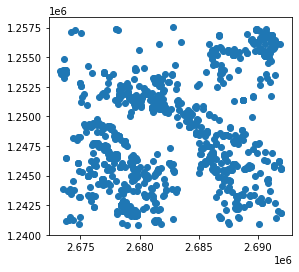

In [25]:
zeckenstiche.plot()

## Übung 2: Koordinatensystem festlegen

Wir wissen zwar, das unsere *GeoDataFrame* in Schweizer Landeskoordinaten (CH1903 LV95) zu verstehen ist, aber dies haben wir noch nirgends festgehalten. Das Koordinatensystem (Coordinate Reference System, CRS) können wir über das Attribut `crs` der *GeoDataFrame* festhalten. Das Koordinatensystem CH1903 LV95 hat den EPSG Code 2056, demnach muss das CRS folgendermassen festgelegt werden:


In [34]:
zeckenstiche = zeckenstiche.set_crs(epsg = 2056)

Nun ist das Koordinatensystem (*CRS*) als Attribut der *GeoDataFrame* gespeichert:

In [31]:
zeckenstiche.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - Liechtenstein and Switzerland
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

## Übung 3: Zeckenstiche als Shapefile exportieren

Zum Schluss exportieren wir unser Datensatz in ein Shapefile, damit wir das nächste Mal direkt mit einer *GeoDataFrame* arbeiten können. Genau wie wir in einer vorherigen Übung eine pandas DataFrame mit `.to_csv` in eine csv exportiert haben, gibt es für GeoDataFrames die Methode `.to_file`. Exportiere zeckenstiche mit dieser Methode in eine Shapefile.

In [32]:
zeckenstiche.to_file("zeckenstiche.shp")